In [51]:
# import all the lib
import tensorflow
import matplotlib.pyplot as plt
from matplotlib import pyplot

from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [52]:
# loading the dataset
(X_train , y_train) , (X_test , y_test ) = fashion_mnist.load_data()

In [53]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


1. In above output 60000 data for training and 10000 for testing
2. 28 rown and 28 columns
3. Total 70000 images


In [54]:
X_train[0]  #1st image

# output -->>images in numbers 0 to 255
# 0 --> white image and nearby 255 -->>black image so from 0 to 255 images color intensity will be increase from grey to black 
# Means we have the dataset of grey scale i.e black n white images

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [55]:
# see labels or classes
classes = ['T-shirt/top' , 'Trouser' , 'Pullover', 'Dress' , 'Coat' , 'Sandal' ,'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']
y_train[0]

9

In [8]:
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


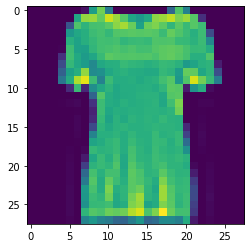

In [56]:
# visualisating the image data

plt.imshow(X_train[10])                                        # image converted into pixels from numbers and image is not clear bcos its resolution is 28 * 28 pixels
# classes[y_train[10][0]]

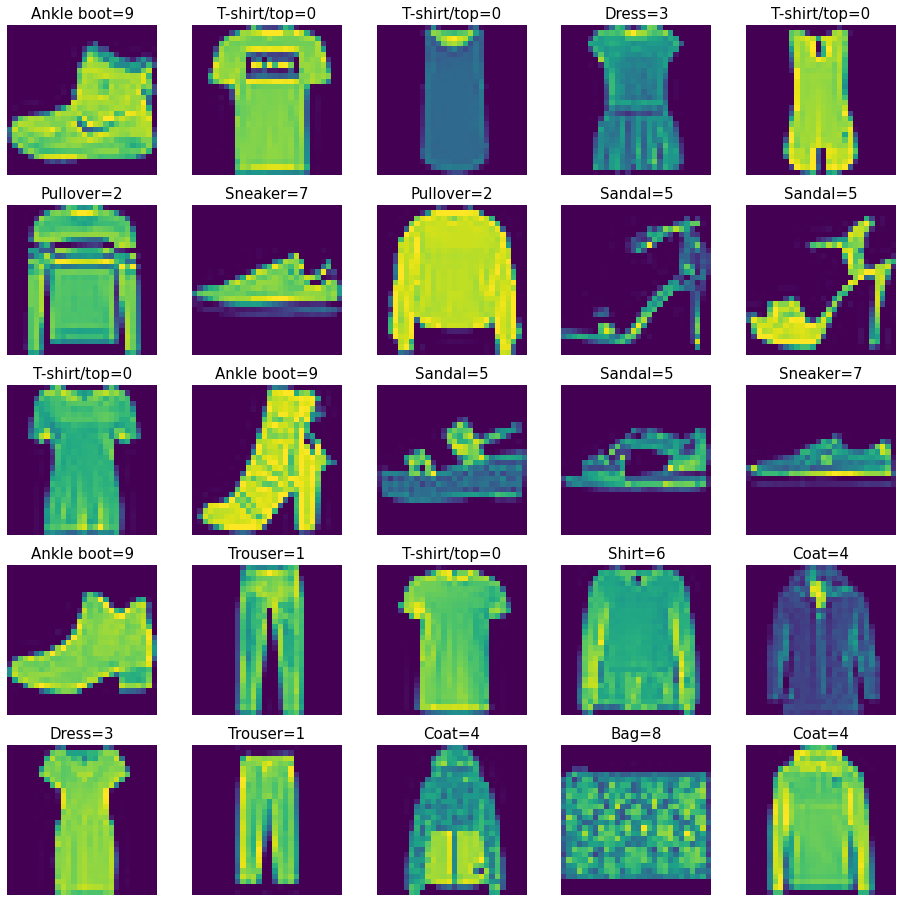

In [57]:
#  to see few images

plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title(classes[y_train[i]] + '=' + str(y_train[i]) , fontsize = 15)

In [58]:
# reshape dataset to have a single channel

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [59]:
# Feature scaling
# nomralise the image --->>range 0-255 ->>converting the images into 0 to 1

X_train = X_train/255 
X_test = X_test/255

In [60]:
# See the normalized data (in form of 0 to 1)

X_train[0]



# means our dat has been scaled now in range from 0 to 1

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [32]:
# X_train=X_train.reshape(1,28,28,3)

In [ ]:
# Now build the neural network 

1. model architecture
2. compile
3. fit or train the model

In [61]:
# 1. Model architecture

model = Sequential()


# conv layer 1
model.add(Conv2D(10 , 3 , activation='relu' , kernel_initializer='he_normal' , input_shape = (28,28,1)))     
model.add(MaxPool2D())     #pool

# conv layer 2
model.add(Conv2D(20 , 3 , activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# conv layer 3
model.add(Conv2D(40 , 3 , activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# flatten
model.add(Flatten())

# hidden layer 1
model.add(Dense(128, activation='sigmoid'))

# hidden layer 2
model.add(Dense(64, activation='relu'))

# hidden layer 3
model.add(Dense(32, activation='sigmoid'))

#output
model.add(Dense(10, activation='softmax'))   # we take 10 neurons bcos we have 10 classes of fashion



# Relu ---> If our neural network will give the output so we get +ve values as well as -ve values so this relu func will take +ve values as +ve and (0 , -ve) values will give as 0 value
# output will give the probability with 10 classes


In [37]:
# our model is created now so now we will see model summary for confirmation

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 10)        280       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 20)        1820      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 20)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 40)          7240      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 40)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 40)               

In [62]:
# 2.compile

model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])


# sparse_categorical_crossentropy --->>becos we are going to perform classification problems(10 class)
# binary_crossentropy -->> binary class problems

In [64]:
# 3. fit or train the model

model.fit(X_train , y_train , epochs= 5 , batch_size=32)

# epochs means iteraions
# epochs = 1 -->> means lets suppose we have 60000 images so 1 epochs menas 60000 images will come to our neural network n will train on dataset and 
# if we want that our neural network will be good learn then we will increase the epochs values -->> suppose epochs values we wil take 5 then complete dataset will 
# come on neural networks and then neural network will train on complete dataset and the again will come whole dataset n will trained 
# so iteration will be done for 5 times so that our accuracy will be be better bcos of increasing the epochs

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8063 - accuracy: 0.7150
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5280 - accuracy: 0.8063
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4674 - accuracy: 0.8285
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4289 - accuracy: 0.8425
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4017 - accuracy: 0.8530


In [65]:
# test and evaluate the model

model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4069 - accuracy: 0.8531


[0.4068513810634613, 0.8531000018119812]

In [ ]:
# In above output -->>
# accuracy of training 85% and testing acc 85%
# both accuracy are close to each other so we can say that our model is not overfitting and we can deploy it now.

In [66]:
#  Predict the data

y_pred = model.predict(X_test)

In [67]:
y_pred[0].round(2)


# output -->> we got the output value in probability form of 10 classes



array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
      dtype=float32)

In [68]:
# 0.99 -- >>for last class or last index our model predict 99 % probability

import numpy as np
classes[np.argmax(y_pred[0].round(2))]


# np.argmax() -->> it will tell us on which index we have max prob value and it will give us that index
# As we can see that we got 9 (Ankle Boot) in output so it is clear that we hav max prob value at 9th index i.e in above we got 0.99 in last 9th index.

# in above class we can see that on 9th index we have Ankle Boot

'Ankle boot'

In [69]:
# Lets check in actual what is the value of 1st image

y_test[0]


#  Here also we got value 9th index and out model also predict above(np.argmax(y_pred[0].round(2))) same 9th index so that means our prediction is working good.

9

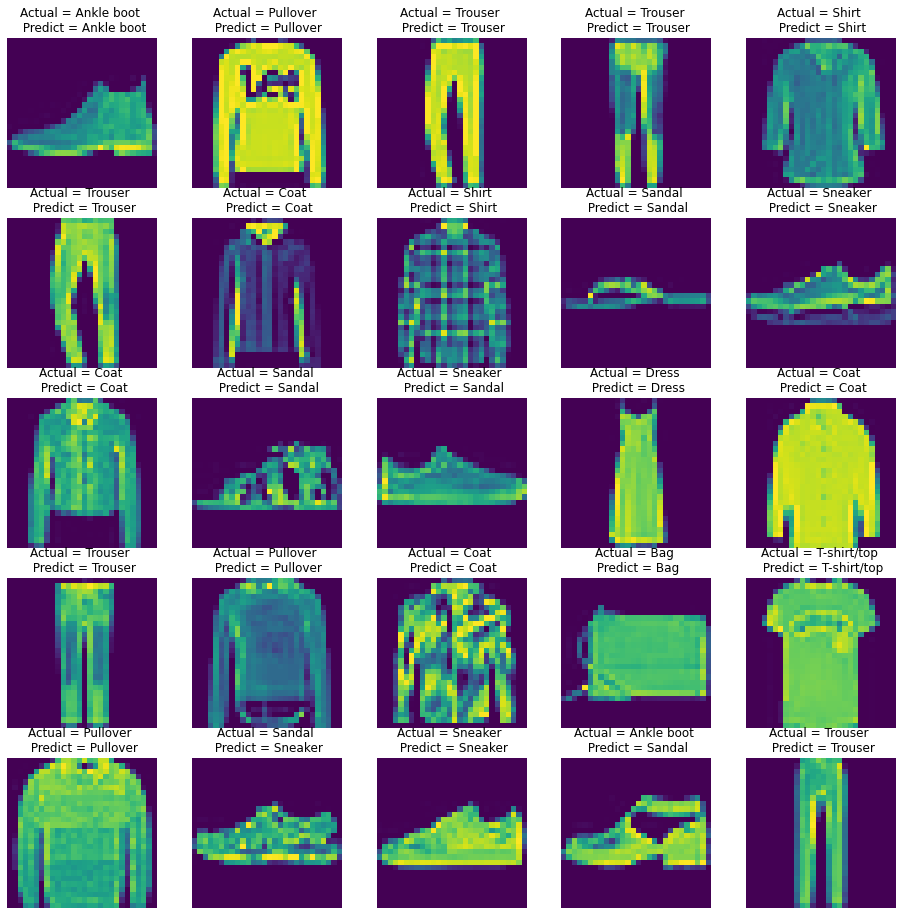

In [70]:
#  Lets check the image on 9th index and test also --->>

plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  # plt.imshow(X_test[i])
  plt.imshow((np.squeeze(X_test[i])))
  plt.axis('off')
  plt.title('Actual = {} \n Predict = {}'.format(classes[y_test[i]] , classes[np.argmax(y_pred[i])]))

Below single image prediction 

In [71]:
image_row = 101

classes[np.argmax(y_pred[image_row])]

'Shirt'

'Shirt'

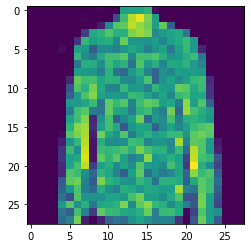

In [72]:

plt.imshow((np.squeeze(X_test[image_row])))
classes[y_test[image_row]]


In [73]:
# Classification report

from sklearn.metrics import classification_report

cr = classification_report(y_test ,[np.argmax(i) for i in y_pred] , target_names = classes)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.85      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.70      0.82      0.75      1000
       Dress       0.88      0.85      0.87      1000
        Coat       0.71      0.80      0.75      1000
      Sandal       0.98      0.93      0.95      1000
       Shirt       0.68      0.46      0.55      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [74]:
#  Save the model

model.save('FMNIST_classifier.h5')

In [75]:
#  Next step will be load the model

load_model = tensorflow.keras.models.load_model('/content/FMNIST_classifier.h5')

In [76]:
load_model.predict(X_test)

array([[1.1473361e-05, 4.9950395e-05, 8.9285631e-06, ..., 3.7629440e-02,
        1.4616584e-04, 9.6076101e-01],
       [1.9442391e-02, 1.9149337e-04, 9.3780547e-01, ..., 9.8311666e-06,
        3.5019775e-03, 2.8795163e-05],
       [4.6206154e-05, 9.9720156e-01, 1.0664438e-04, ..., 5.6060203e-06,
        1.2912346e-05, 1.6832887e-04],
       ...,
       [9.3401421e-04, 2.4152030e-05, 3.1195953e-04, ..., 1.3224727e-04,
        9.9737084e-01, 2.0249832e-05],
       [2.6200249e-05, 9.9760735e-01, 4.6252782e-05, ..., 6.6082066e-06,
        1.0625971e-05, 5.3768650e-05],
       [1.2381233e-03, 1.2611416e-04, 1.1474046e-04, ..., 3.1905081e-02,
        4.8921257e-01, 3.2356305e-03]], dtype=float32)